# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Conclusions:
1) There is a definitive increase as we move closer to the equator from the extreme end points, but the data clearly shows the hottest temps are not at the equator.  Temperatures as a whole climax around the 20 degree latitude mark.
    
2) There is no correlation to wind speed and latitude.  No matter the location, the majority of wind speeds were pretty standard around the world.
    
3) There is no concrete conclusion to cloudiness and latitude, althought it is noted that between the -40 and 40 latitude mark, when it comes to 0% or 100% cloudiness, most cities either ranked one end or the other.
    
4) The data does not provide any concrete conclusion that wind, humidity, or cloudiness is a major factor in temperature.  The biggest conclusions we can see here is that -60 and 60 latitude marks are clear colder temps and peak out as a data set as we move toward the 20 latitude mark.
    

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [90]:
#verifying api key works
api_key

## Generate Cities List

In [91]:
#use url to access required data
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84


In [92]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [94]:
#assign variables to store findings
city_list = []
temp = []
lat = []
long = []
humidity = []
cloudiness = []
wind = []
record = 0
batch = 1

print ("=============================")
print ("Beginning Data Retrieval")     
print ("=============================")

#loop multiple cities and batch in sets of 50.
for city in cities:
#for city in test_cities: 
    response = requests.get(url + f"&q={city}").json()
    if record < 50:
        record = record + 1
    else:
        batch = batch + 1
        record = 1
    
    #set output format
    print("Processing Record {} of Set {} ----> {}".format(record, batch, city))
    print(url)
    
    try:
        
        city_list.append(response["name"])
        temp.append(response["main"]["temp"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
    
    except:
        print(f"Can't find {city}. Skipping...")
    
# print(city_list)
# print(temp)
# print(lat)
# print(long)
# print(humidity)    
# print(cloudiness)
# print(wind)


print ("============================")
print ("Data Retrieval Complete")     
print ("============================")



    

Beginning Data Retrieval
Processing Record 1 of Set 1 ----> vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 2 of Set 1 ----> busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 3 of Set 1 ----> asau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Can't find asau. Skipping...
Processing Record 4 of Set 1 ----> coahuayana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 5 of Set 1 ----> qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 6 of Set 1 ----> butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 7 of Set 1 ----> luancheng
http://api.openweathermap.org/data

Processing Record 4 of Set 2 ----> french harbor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 5 of Set 2 ----> fruitvale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 6 of Set 2 ----> banepa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 7 of Set 2 ----> albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 8 of Set 2 ----> inta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 9 of Set 2 ----> mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 10 of Set 2 ----> hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a

Processing Record 10 of Set 3 ----> beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 11 of Set 3 ----> airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 12 of Set 3 ----> vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 13 of Set 3 ----> saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 14 of Set 3 ----> keti bandar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 15 of Set 3 ----> mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Can't find mys shmidta. Skipping...
Processing Record 16 of Set 3 ----> ancud
http://api.openweathermap.org/data/2.

Processing Record 16 of Set 4 ----> kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 17 of Set 4 ----> iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 18 of Set 4 ----> sisimiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 19 of Set 4 ----> tilichiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 20 of Set 4 ----> luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 21 of Set 4 ----> thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 22 of Set 4 ----> flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30db

Processing Record 22 of Set 5 ----> urdzhar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Can't find urdzhar. Skipping...
Processing Record 23 of Set 5 ----> inderborskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Can't find inderborskiy. Skipping...
Processing Record 24 of Set 5 ----> neustrelitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 25 of Set 5 ----> bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 26 of Set 5 ----> pitimbu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 27 of Set 5 ----> yacuiba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 28 of Set 5 ----> kosa
http://api.o

Processing Record 27 of Set 6 ----> iberia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 28 of Set 6 ----> grand-lahou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 29 of Set 6 ----> cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 30 of Set 6 ----> bhuvanagiri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 31 of Set 6 ----> nouadhibou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 32 of Set 6 ----> le port
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 33 of Set 6 ----> marsh harbour
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d

Processing Record 32 of Set 7 ----> betamcherla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 33 of Set 7 ----> houlton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 34 of Set 7 ----> belaya gora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 35 of Set 7 ----> banjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 36 of Set 7 ----> laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 37 of Set 7 ----> olafsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Can't find olafsvik. Skipping...
Processing Record 38 of Set 7 ----> shunyi
http://api.openweathermap.org/data/2.5/weather?

Processing Record 38 of Set 8 ----> dalianwan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 39 of Set 8 ----> sabang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 40 of Set 8 ----> la ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 41 of Set 8 ----> acarau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Can't find acarau. Skipping...
Processing Record 42 of Set 8 ----> xining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 43 of Set 8 ----> grimari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Can't find grimari. Skipping...
Processing Record 44 of Set 8 ----> alekseyevka
http://api.openweat

Processing Record 44 of Set 9 ----> altay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 45 of Set 9 ----> chany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 46 of Set 9 ----> mecca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 47 of Set 9 ----> marystown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 48 of Set 9 ----> kamenskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Can't find kamenskoye. Skipping...
Processing Record 49 of Set 9 ----> borovichi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 50 of Set 9 ----> nenjiang
http://api.openweathermap.org/data/2.5/weather?un

Processing Record 49 of Set 10 ----> katsina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 50 of Set 10 ----> jadu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 1 of Set 11 ----> lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 2 of Set 11 ----> constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 3 of Set 11 ----> ouro preto do oeste
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 4 of Set 11 ----> pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 5 of Set 11 ----> libiaz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1

Processing Record 6 of Set 12 ----> zhicheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 7 of Set 12 ----> nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Can't find nizhneyansk. Skipping...
Processing Record 8 of Set 12 ----> savonlinna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 9 of Set 12 ----> camana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Can't find camana. Skipping...
Processing Record 10 of Set 12 ----> kamaishi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 11 of Set 12 ----> atherton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 12 of Set 12 ----> rungata
http://

Processing Record 13 of Set 13 ----> yakeshi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 14 of Set 13 ----> kibakwe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 15 of Set 13 ----> karpogory
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 16 of Set 13 ----> ust-bolsheretsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Can't find ust-bolsheretsk. Skipping...
Processing Record 17 of Set 13 ----> nybro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 18 of Set 13 ----> letpadan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d17d74ec30dbc00a5d6d715452369d84
Processing Record 19 of Set 13 ----> sidi ali
http://api.openweathermap.org

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [95]:
#create a dictionary list for our new df
weather_dict = {
    "City List": city_list,
    "Temperature": temp,
    "Latitude": lat,
    "Longitude": long,
    "Humidity": humidity,
    "Cloudiness" : cloudiness,
    "Wind" : wind
}

#show total results
weather_results.count()

City List      547
Temperature    547
Latitude       547
Longitude      547
Humidity       547
Cloudiness     547
Wind           547
dtype: int64

In [96]:
#export results to csv
weather_results.to_csv('city_data.csv', sep=',', index=False)

In [107]:
#turn into a df and store it
weather_results = pd.DataFrame(weather_dict)
weather_results.head(3)

,City List,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind
0,Vaini,81.31,15.34,74.49,82,40,10.45
1,Busselton,57.54,-33.64,115.35,60,92,17.00
2,Coahuayana,76.20,18.62,-100.35,72,24,3.22


In [111]:
#elims index markers and moves city list to index position
#weather_results.set_index("City List", inplace=True)
weather_results.head(3)

,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind
City List,,,,,,
Vaini,81.31,15.34,74.49,82,40,10.45
Busselton,57.54,-33.64,115.35,60,92,17.00
Coahuayana,76.20,18.62,-100.35,72,24,3.22


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

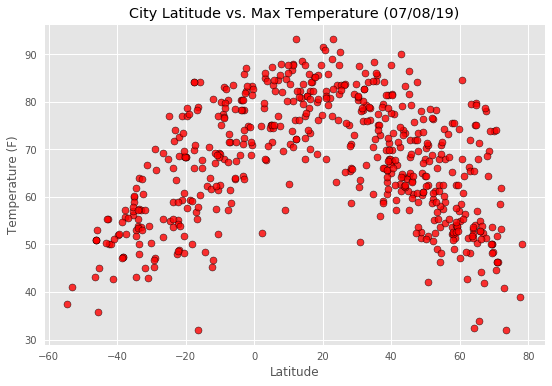

In [112]:
#assign an x and y label for plot purposes
lat_plot = weather_results["Latitude"]
temp_plot = weather_results["Temperature"]

#customizing chart
plt.style.use('ggplot')
plt.scatter(lat_plot, temp_plot, edgecolors="black", c='red', alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("City Latitude vs. Max Temperature (07/08/19)")
plt.savefig('LatTempCompare.png')

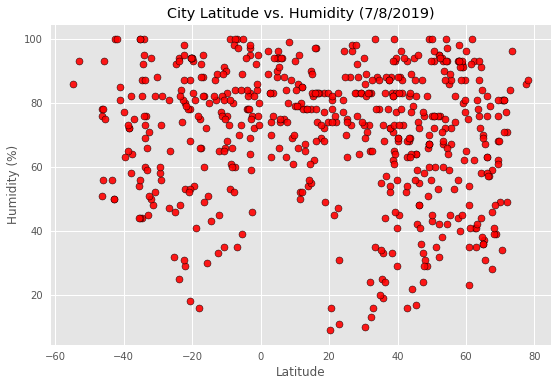

In [113]:
#assign an x and y label for plot purposes
lat_stats = weather_results["Latitude"]
humid_stats = weather_results["Humidity"]

#customizing chart
plt.style.use('ggplot')
plt.scatter(lat_stats, humid_stats, alpha=0.9, c='red', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (7/8/2019)")
plt.savefig('LatHumidCompare.png')

#### Latitude vs. Humidity Plot

In [114]:
weather_results.head(3)

,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind
City List,,,,,,
Vaini,81.31,15.34,74.49,82,40,10.45
Busselton,57.54,-33.64,115.35,60,92,17.00
Coahuayana,76.20,18.62,-100.35,72,24,3.22


#### Latitude vs. Cloudiness Plot

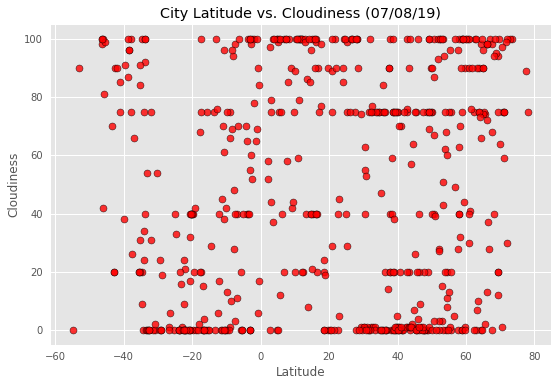

In [115]:
#assign an x and y label for plot purposes
lat_stats = weather_results["Latitude"]
cloud_stats = weather_results["Cloudiness"]

#customizing chart
plt.style.use('ggplot')
plt.scatter(lat_stats, cloud_stats, c="red", edgecolors="black", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (07/08/19)")
plt.savefig('LatCloudinessCompare.png')

#### Latitude vs. Wind Speed Plot

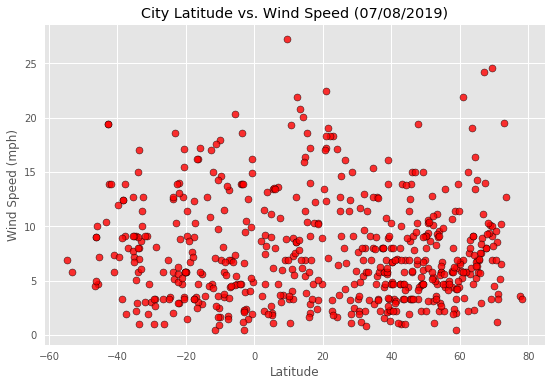

In [116]:
#assign an x and y label for plot purposes
lat_stats = weather_results["Latitude"]
wind_stats = weather_results["Wind"]

#customizing chart
plt.style.use('ggplot')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (07/08/2019)")
plt.scatter(lat_stats, wind_stats, c='red', alpha=0.8, edgecolors='black')
plt.savefig('LatWindCompare.png')

In [117]:
# Conclusions:
#     1) There is a definitive increase as we move closer to the equator from the 
#     extreme end points, but the data clearly shows the hottest temps are not at the
#     equator.  Temperatures as a whole climax around the 20 degree latitude mark.
    
#     2) There is no correlation to wind speed and latitude.  No matter the location, 
#     the majority of wind speeds were pretty standard around the world.
    
#     3) There is no concrete conclusion to cloudiness and latitude, althought it is
#     noted that between the -40 and 40 latitude mark, when it comes to 0% or 100% 
#     cloudiness, most cities either ranked one end or the other.
    
#     4) The data does not provide any concrete conclusion that wind, humidity, or 
#     cloudiness is a major factor in temperature.  The biggest conclusions we can see 
#     here is that -60 and 60 latitude marks are clear colder temps and peak out as a 
#     data set as we move toward the 20 latitude mark.
    